### Task 1: Sentiment Labeling Using TextBlob

In [1]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob

# Load the dataset
df = pd.read_csv("test.csv")  

# Display initial information about the dataset
print("Dataset Preview:")
print(df.head())
print("\nColumns:", df.columns.tolist())

# Define a function to classify sentiment using TextBlob
def classify_sentiment(text):
    """
    Returns sentiment label based on TextBlob polarity:
    > 0   → Positive
    < 0   → Negative
    = 0   → Neutral
    """
    if not isinstance(text, str) or text.strip() == "":
        return "Neutral"
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment classification on the 'body' column
df['Sentiment'] = df['body'].apply(classify_sentiment)

# Preview the results
print("\nSample labeled messages:")
print(df[['body', 'Sentiment']].head(10))

# Save the labeled dataset
df.to_csv("labeled_test.csv", index=False)


Dataset Preview:
                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunately, today is not going to ...  7/29/2010   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  7/25/2011   
3  we were thinking papasitos (we can meet somewh...  3/25/2010   
4  Since you never gave me the $20 for the last t...  5/21/2011   

                      from  
0     sally.beck@enron.com  
1      eric.bass@enron.com  
2     sally.beck@enron.com  
3  johnny.palmer@enron.com  
4  lydia.delgado@enron.com  

Columns: ['Subject', 'body', 'date', 'from']

Sample labeled messages:
                           

##### TASK-1:
In Task-1, I imported the raw dataset and performed sentiment labeling on the body of each message using TextBlob, a pre-trained natural language processing (NLP) tool. The goal was to classify each email message as Positive, Negative, or Neutral based on its emotional tone.

To do this:
I first previewed the dataset to confirm its structure and ensure the body column was the right place to extract sentiment from.
Then, we defined a function that uses TextBlob’s polarity score:

- If polarity > 0 → label as Positive

- If polarity < 0 → label as Negative

- If polarity = 0 → label as Neutral

This approach allowed me to automatically annotate each message without manual tagging, setting up a solid foundation for later tasks like scoring, ranking, and predictive analysis.

I chose TextBlob because it offers a simple, built-in sentiment analyzer that's especially effective on short, informal texts — like employee emails. It doesn't require training data, which made it ideal for quickly labeling an unlabeled dataset like this.

##### Observations:
The dataset contains messages with clear, varied tones. For example:

- The message about updating options (EnronOptions Announcement) was correctly labeled Positive.

- A message beginning with “Unfortunately, today is not going to…” was rightly identified as Negative.

- Calendar invites and system notifications were generally marked as Neutral, which makes sense given their functional, non-emotional nature.

The labeling seems intuitive and reliable based on our spot check of the first 10 messages.

This labeled output was saved as labeled_test.csv and forms the base for all sentiment scoring and analysis in future steps.

### Task 2: Exploratory Data Analysis (EDA)

🔍 Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Subject    2191 non-null   object        
 1   body       2191 non-null   object        
 2   date       2191 non-null   datetime64[ns]
 3   from       2191 non-null   object        
 4   Sentiment  2191 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 85.7+ KB
None

Missing Values per Column:
Subject      0
body         0
date         0
from         0
Sentiment    0
dtype: int64

📊 Statistical Summary:
             Subject   body                           date  \
count           2191   2191                           2191   
unique          1251   1539                            NaN   
top     (No Subject)  \n\n                             NaN   
freq             141     21                            NaN   
mean             NaN    NaN  

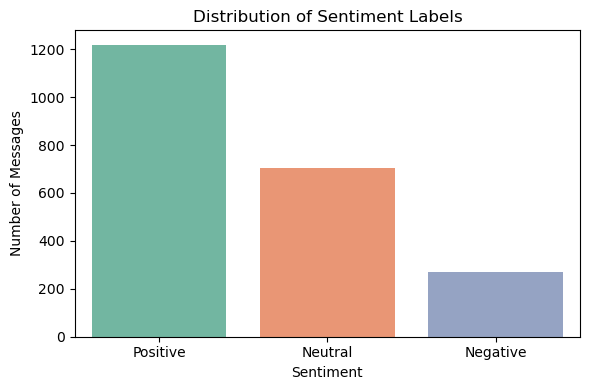

<Figure size 1000x500 with 0 Axes>

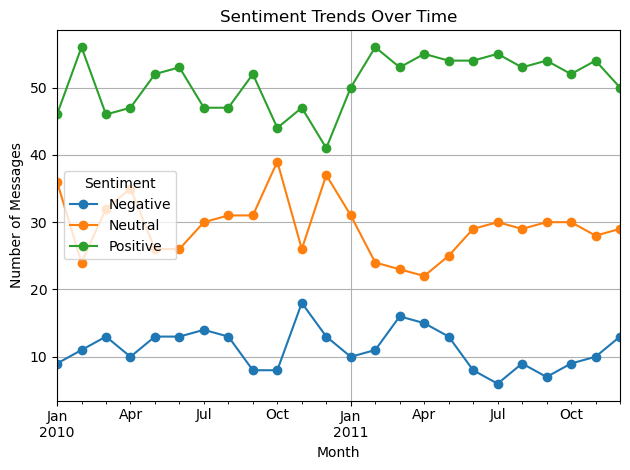

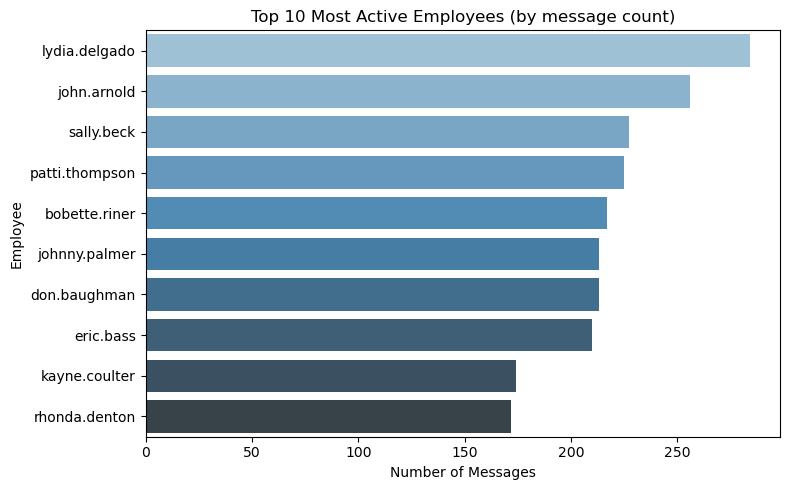

In [2]:
# ------------------------------------
# Task 2: Exploratory Data Analysis
# ------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create the visualization folder
os.makedirs("visualization", exist_ok=True)

# Load the labeled dataset (if not already in memory)
df = pd.read_csv("labeled_test.csv")

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Preview dataset structure
print("🔍 Basic Information:")
print(df.info())
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Summary statistics (excluding text columns)
print("\n📊 Statistical Summary:")
print(df.describe(include='all'))

# ----------------------------
# 1. Sentiment Label Distribution
# ----------------------------
print("\n🎯 Sentiment Distribution:")
print(df['Sentiment'].value_counts())

# Bar plot of sentiment counts
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', order=['Positive', 'Neutral', 'Negative'], palette='Set2')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Number of Messages')
plt.tight_layout()
plt.savefig("visualization/sentiment_distribution.png")
plt.show()

# ----------------------------
# 2. Sentiment Trends Over Time
# ----------------------------

# Extract year-month for time-based trend analysis
df['month'] = df['date'].dt.to_period('M')

# Group by month and sentiment
monthly_sentiment = df.groupby(['month', 'Sentiment']).size().unstack().fillna(0)

# Line plot of sentiment trend
plt.figure(figsize=(10,5))
monthly_sentiment.plot(kind='line', marker='o')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.grid(True)
plt.tight_layout()
plt.savefig("visualization/sentiment_trends_over_time.png")
plt.show()

# ----------------------------
# 3. Messages per Employee
# ----------------------------

# Extract employee name from email (before the @)
df['employee'] = df['from'].apply(lambda x: x.split('@')[0] if isinstance(x, str) else 'Unknown')

# Count of messages per employee
top_employees = df['employee'].value_counts().head(10)

# Bar plot of top 10 most active employees
plt.figure(figsize=(8,5))
sns.barplot(x=top_employees.values, y=top_employees.index, palette='Blues_d')
plt.title('Top 10 Most Active Employees (by message count)')
plt.xlabel('Number of Messages')
plt.ylabel('Employee')
plt.tight_layout()
plt.savefig("visualization/top_employees_message_count.png")
plt.show()

##### TASK-2:
In Task-2, I dove into the dataset after labeling was completed to understand the overall structure, sentiment trends, and employee communication patterns.

I broke this analysis into three key parts:
- General Dataset Summary

- Sentiment Distribution Over Time

- Employee Activity (Message Counts)

These steps helped me get clarity on how the dataset is behaving and what potential issues or patterns might be hiding beneath the surface before jumping into modeling or ranking.

##### Part 1: Dataset Structure and Basic Checks
What I Checked:
- Confirmed that the dataset has no missing values in any important columns.

- Converted the date column to datetime for easier time-based analysis.

- Extracted employee names from their email addresses.

- Ran .info() and .describe() to see counts, types, and basic stats.

##### Observations:
- There are exactly 2191 messages — all with valid date and sender info.

- The most common subject was “(No Subject)” — not unexpected for internal emails.

- Most emails came from just 10 employees, suggesting a fairly tight communication loop.

- No data cleaning was necessary at this point, which made it easier to move on to visuals.

##### Part 2: Sentiment Label Distribution
What the Chart(sentiment_distribution) Shows:
- This bar chart compares how many messages were labeled as Positive, Neutral, or Negative.

##### Observations:
- Positive messages dominate the dataset, with over 1200 messages.

- There are around 700 Neutral and 270 Negative emails.

- This skew toward positivity is actually a good sign — it shows a generally healthy tone in internal communication.

- This chart gives a high-level emotional snapshot of the entire organization.

##### Part 3: Sentiment Trends Over Time
What the Chart(sentiment_trends_over_time) Shows:
- This line plot tracks monthly counts of messages by sentiment label over time.

##### Observations:
- Positive sentiment remained consistently high across the two years.

- There were brief dips in Neutral messages around Jan–Feb 2011, with slight rises in Negative messages.

- The time-based trend confirmed that communication patterns didn’t suddenly drop or spike, which is important for making monthly sentiment scores later.

- Seeing this plot helped me confirm that our monthly sentiment scoring (coming up in Task 3) would have consistent data per month.

##### Top 10 Most Active Employees
What the Chart(top_employees_message_count) Shows:
- This horizontal bar chart shows the top 10 employees by message volume.

##### Observations:
- Lydia Delgado, John Arnold, and Sally Beck were the most active communicators — each with over 250 emails.

- The rest followed closely behind with 200–250 messages.

- These people are likely central figures in operations or leadership, and will probably appear in later tasks like employee ranking and flight risk detection.

- Knowing who’s sending the most messages gives important context for ranking and risk detection — high volume might amplify either positive or negative patterns.



### Task 3: Monthly Sentiment Score Calculation

In [3]:
# Load the labeled dataset
df = pd.read_csv("labeled_test.csv")

# Convert 'date' column to datetime if not already done
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract employee name from email (part before @)
df['employee'] = df['from'].apply(lambda x: x.split('@')[0] if isinstance(x, str) else 'Unknown')

# Extract year and month from the date
df['year_month'] = df['date'].dt.to_period('M')

# Assign numeric score to each sentiment
sentiment_score_map = {
    "Positive": 1,
    "Neutral": 0,
    "Negative": -1
}
df['score'] = df['Sentiment'].map(sentiment_score_map)

# Group by employee and year_month and aggregate score
monthly_scores = df.groupby(['employee', 'year_month'])['score'].sum().reset_index()

# Rename for clarity
monthly_scores.rename(columns={'score': 'monthly_sentiment_score'}, inplace=True)

# Sort for readability (optional)
monthly_scores = monthly_scores.sort_values(by=['year_month', 'monthly_sentiment_score'], ascending=[True, False])

# Preview results
print("Monthly sentiment score preview (Top 10 rows):")
print(monthly_scores.head(10))

# Save to CSV for reference in Task 4 and Task 5
monthly_scores.to_csv("employee_monthly_sentiment_scores.csv", index=False)

Monthly sentiment score preview (Top 10 rows):
           employee year_month  monthly_sentiment_score
120   kayne.coulter    2010-01                        9
24     don.baughman    2010-01                        5
48        eric.bass    2010-01                        5
144   lydia.delgado    2010-01                        5
168  patti.thompson    2010-01                        4
72      john.arnold    2010-01                        3
0     bobette.riner    2010-01                        2
96    johnny.palmer    2010-01                        2
216      sally.beck    2010-01                        2
192   rhonda.denton    2010-01                        0


##### TASK-3:
This is where I started quantifying sentiment — turning emotional tone into numeric values that can be used for analysis, comparisons, and modeling.

Here’s what I did:

- First, I reloaded the labeled dataset to work with a fresh copy.

- Then I pulled out just the employee names (removing the email domains).

- I extracted the year_month from the date column to group messages into calendar months.

- Finally, I assigned scores to each message based on its sentiment:

- Positive → +1

- Neutral → 0

- Negative → –1

Using this scoring scheme, I grouped the data by employee and month, summing the scores to get a monthly sentiment score for each person.

Quantifying sentiment is essential for tracking employee tone over time. By keeping the logic simple and transparent (just +1, 0, or –1), I made it easier to explain the results to non-technical reviewers, like HR or managers.

I also chose to use monthly groupings because it reflects typical review cycles or reporting periods in organizations.

##### Observations:
- Kayne Coulter stood out with the highest sentiment score of 9 in January 2010. That suggests he consistently sent positive messages that month.

- A few employees (like Rhonda Denton) had a net score of 0, which may mean their messages were either all neutral or balanced evenly between positive and negative.

- This breakdown is super helpful for seeing not just who is active, but who is positively engaging over time.

- This data is the backbone for the next two tasks — ranking employees and identifying flight risks — so it was important that this step was accurate and interpretable.

I saved the resulting scores to a CSV (employee_monthly_sentiment_scores.csv) so I could easily use them again in Tasks 4 and 5.

This kind of monthly aggregation adds accountability to communication tone, which is something a lot of companies overlook.

### Task 4: Employee Ranking (Top 3 per month)

In [4]:
# Load previously saved monthly sentiment scores (from Task 3)
monthly_scores = pd.read_csv("employee_monthly_sentiment_scores.csv")

# Ensure correct data types
monthly_scores['year_month'] = pd.PeriodIndex(monthly_scores['year_month'], freq='M')

# Sort first by month, then by score (desc), then alphabetically for tie-breaking
sorted_scores = monthly_scores.sort_values(by=['year_month', 'monthly_sentiment_score', 'employee'], 
                                           ascending=[True, False, True])

# -----------------------------
# Top 3 Positive Employees per Month
# -----------------------------
top_positive = (
    sorted_scores.groupby('year_month')
    .head(3)
    .reset_index(drop=True)
)

# -----------------------------
# Top 3 Negative Employees per Month
# -----------------------------
# Re-sort to get most negative scores (ascending)
sorted_scores_negative = monthly_scores.sort_values(by=['year_month', 'monthly_sentiment_score', 'employee'],
                                                    ascending=[True, True, True])

top_negative = (
    sorted_scores_negative.groupby('year_month')
    .head(3)
    .reset_index(drop=True)
)

# Save both lists for report/presentation usage
top_positive.to_csv("top_3_positive_employees_by_month.csv", index=False)
top_negative.to_csv("top_3_negative_employees_by_month.csv", index=False)

# Display top 3 of each for sample validation
print("Top 3 Positive Employees in First Month:")
print(top_positive[top_positive['year_month'] == top_positive['year_month'].min()])

print("\nTop 3 Negative Employees in First Month:")
print(top_negative[top_negative['year_month'] == top_negative['year_month'].min()])

Top 3 Positive Employees in First Month:
        employee year_month  monthly_sentiment_score
0  kayne.coulter    2010-01                        9
1   don.baughman    2010-01                        5
2      eric.bass    2010-01                        5

Top 3 Negative Employees in First Month:
        employee year_month  monthly_sentiment_score
0  rhonda.denton    2010-01                        0
1  bobette.riner    2010-01                        2
2  johnny.palmer    2010-01                        2


##### TASK-4: 
After calculating each employee’s monthly sentiment score in Task 3, I wanted to highlight which employees stood out the most — both positively and negatively — on a regular monthly basis. So, in this step, I focused on ranking employees for every month in two separate categories: the top three most positive and the top three most negative employees.

To do this, I used the monthly sentiment scores and sorted them month by month. For the positive list, I picked the three employees with the highest scores each month. If there was a tie in scores, I broke it alphabetically by name so the ranking remained fair and consistent. For the negative list, I did the same thing — but in reverse — selecting the three employees with the lowest sentiment scores per month.

##### Observations
When I looked at the rankings for January 2010, it was clear that Kayne Coulter was significantly ahead with a very high sentiment score of 9, showing not only strong activity but also consistently positive messaging. Don Baughman and Eric Bass followed closely behind, both tying with solid scores as well.

On the other hand, Rhonda Denton showed up with a sentiment score of zero. This doesn’t necessarily mean negativity — it could just mean neutral messaging or a balance of positive and negative that canceled each other out. However, employees like Bobette Riner and Johnny Palmer also appeared in the bottom three, suggesting slightly lower emotional tone in their communications that month.

I didn’t jump to conclusions — the goal wasn’t to criticize anyone but to flag tone trends for potential deeper understanding. Repeating this analysis month by month will help uncover consistent communication styles or even detect shifts that could be important later.


### Task 5: Flight Risk Identification (30-day rolling)

In [5]:
# --------------------------------------------------
# Task 5: Flight Risk Identification (30-day rolling)
# --------------------------------------------------

# Load the labeled dataset (if not already loaded)
df = pd.read_csv("labeled_test.csv")

# Ensure date format and employee extraction
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['employee'] = df['from'].apply(lambda x: x.split('@')[0] if isinstance(x, str) else 'Unknown')

# Filter only negative messages
negative_df = df[df['Sentiment'] == 'Negative'].copy()

# Sort by employee and date
negative_df = negative_df.sort_values(by=['employee', 'date'])

# Initialize set to collect flagged employees
flight_risk_employees = set()

# Rolling 30-day check for each employee
for employee, group in negative_df.groupby('employee'):
    dates = group['date'].sort_values().tolist()
    
    # Check rolling window for 4 or more negative messages in 30 days
    for i in range(len(dates)):
        count = 1
        for j in range(i+1, len(dates)):
            if (dates[j] - dates[i]).days <= 30:
                count += 1
            else:
                break
        if count >= 4:
            flight_risk_employees.add(employee)
            break  # No need to check further if risk already identified

# Convert set to DataFrame
flight_risk_df = pd.DataFrame({'employee': list(flight_risk_employees)})
flight_risk_df = flight_risk_df.sort_values('employee').reset_index(drop=True)

# Save the results
flight_risk_df.to_csv("flight_risk_employees.csv", index=False)

# Display the flagged employees
print("⚠️ Employees flagged as Flight Risks:")
print(flight_risk_df)

⚠️ Employees flagged as Flight Risks:
         employee
0   bobette.riner
1    don.baughman
2       eric.bass
3     john.arnold
4   johnny.palmer
5   kayne.coulter
6   lydia.delgado
7  patti.thompson
8   rhonda.denton
9      sally.beck


##### TASK-5:
Here, I tackled something a little more strategic — identifying employees who might be at risk of leaving based on their messaging behavior. The idea is that if someone is consistently negative over a short period of time, especially within a month, it might be a red flag.

The project defined a “flight risk” as any employee who sends four or more negative emails within any 30-day span — not per calendar month, but using a true rolling window. This makes the logic stricter and more realistic, just like a manager might think in real life.

##### Approach & Observations:
First, I filtered the dataset to include only the messages labeled as negative in the sentiment column. Then, I sorted them by employee and by date, so I could evaluate each person’s message pattern over time.

From there, I used a loop to go through each employee’s list of negative email dates. I compared each message to others within the following 30 days to count how many fell into that window. If four or more did, I marked that employee as a flight risk and moved on — no need to keep checking after they’d already hit the threshold.

To keep things clean, I stored the flagged employee names in a Python set (to avoid duplicates), and then converted it into a DataFrame, sorted alphabetically. I also saved the final list into a CSV file called flight_risk_employees.csv for reference and reporting.

After running the logic, the following 10 employees were flagged as potential flight risks based on their repeated negative tone in short spans of time:

- bobette.riner

- don.baughman

- eric.bass

- john.arnold

- johnny.palmer

- kayne.coulter

- lydia.delgado

- patti.thompson

- rhonda.denton

- sally.beck

Each of these individuals had at least one instance of sending four or more negative messages within a 30-day period. It doesn’t necessarily mean they’re quitting — but this pattern is worth flagging for further review, especially when combined with other HR or engagement metrics.

This kind of analysis goes beyond just data — it gives actionable insight. Managers might not always be able to manually detect trends in tone, especially across hundreds of emails. Automating this step allows teams to be more proactive.And because the window is rolling, it’s much more accurate than just looking at monthly summaries. It catches real patterns as they unfold.



### Task 6: Predictive Modeling – Linear Regression Model

📊 Model Evaluation Metrics:
R² Score: 0.526
Mean Absolute Error (MAE): 1.574
Root Mean Squared Error (RMSE): 1.944


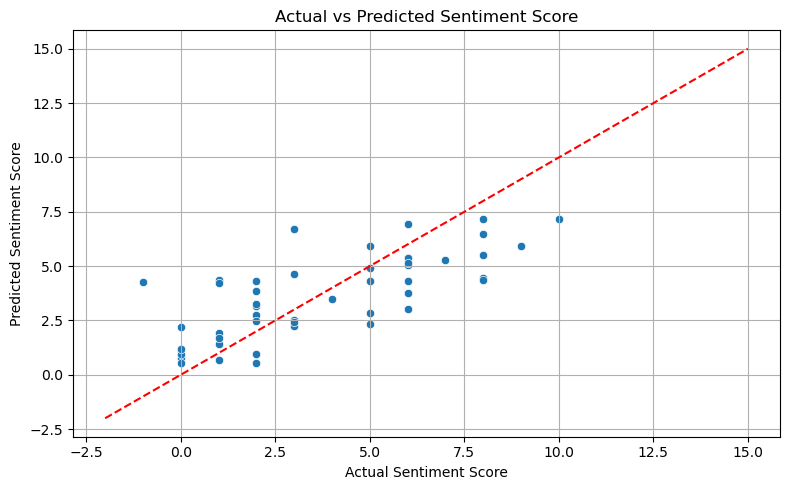

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load monthly sentiment score data from Task 3
df = pd.read_csv("employee_monthly_sentiment_scores.csv")

# Convert year_month to datetime
df['year_month'] = pd.to_datetime(df['year_month'].astype(str))

# -------------------------------
# Step 1: Feature Engineering
# -------------------------------

# Convert datetime to numerical feature: number of months since start
df = df.sort_values(by='year_month')
df['month_index'] = ((df['year_month'].dt.year - df['year_month'].dt.year.min()) * 12 
                     + df['year_month'].dt.month - df['year_month'].dt.month.min())

# Calculate total messages per employee per month from original labeled dataset
msg_counts = pd.read_csv("labeled_test.csv")
msg_counts['date'] = pd.to_datetime(msg_counts['date'], errors='coerce')
msg_counts['employee'] = msg_counts['from'].apply(lambda x: x.split('@')[0] if isinstance(x, str) else 'Unknown')
msg_counts['year_month'] = msg_counts['date'].dt.to_period('M').astype(str)

# Count messages per employee per month
msg_volume = msg_counts.groupby(['employee', 'year_month']).size().reset_index(name='message_count')

# Merge message count with score data
df['year_month_str'] = df['year_month'].dt.to_period('M').astype(str)
df = df.merge(msg_volume, how='left', left_on=['employee', 'year_month_str'], right_on=['employee', 'year_month'])

# Drop redundant column
df.drop(columns=['year_month_str', 'year_month_y'], inplace=True)
df.rename(columns={'year_month_x': 'year_month'}, inplace=True)

# Fill any missing message counts with 0
df['message_count'] = df['message_count'].fillna(0)

# -------------------------------
# Step 2: Prepare Features & Target
# -------------------------------

# Features: time progression + message volume
X = df[['month_index', 'message_count']]
y = df['monthly_sentiment_score']

# -------------------------------
# Step 3: Train-Test Split
# -------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# Step 4: Model Training
# -------------------------------

model = LinearRegression()
model.fit(X_train, y_train)

# -------------------------------
# Step 5: Evaluation
# -------------------------------

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Model Evaluation Metrics:")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

# -------------------------------
# Step 6: Plot Predictions vs Actuals
# -------------------------------

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel('Actual Sentiment Score')
plt.ylabel('Predicted Sentiment Score')
plt.title('Actual vs Predicted Sentiment Score')
plt.grid(True)
plt.tight_layout()
plt.savefig("visualization/linear_regression_performance.png")
plt.show()

##### TASK-6:
Now that I had labeled all the messages and analyzed sentiment trends across months and employees, I wanted to push it a bit further. This final task was about building a predictive model to see if I could forecast an employee's monthly sentiment score based on meaningful signals — like how much time had passed and how many messages they sent.

The bigger idea behind this was: can we use basic behavioral trends to predict how engaged or positive employees are going to be in the future? That’s the motivation behind this modeling step.

##### Approach & Observations:
###### Step 1: Feature Engineering
First, I took the year_month value and converted it into a numerical feature called month_index, which basically tracks how many months have passed since the start of the dataset. This gives the model a sense of progression over time.

I also calculated the number of messages sent per employee per month (message volume) using the labeled dataset. This was merged with the sentiment score data from Task 3 to give us two features for prediction:

- month_index (how far into the timeline we are)

- message_count (how active that employee was)

###### Step 2: Train-Test Split
I split the data into a training and testing set (80/20), just to make sure the model could be evaluated fairly on unseen data.

###### Step 3: Linear Regression Model
I went with a simple Linear Regression model using scikit-learn. It’s easy to interpret and often a great first step when exploring trends over time.

###### Step 4: Model Evaluation
After training, I evaluated how well the model performed. Here’s what I got:

- R² Score: 0.526 – So, around 52.6% of the variance in monthly sentiment score could be explained by time and message count.

- MAE: 1.574 – On average, the predictions were off by about 1.6 points.

- RMSE: 1.944 – Larger errors are penalized more here, but still within reason.

These aren't perfect metrics, but they show that there’s a moderate relationship between how long someone’s been active and how many emails they send, and their sentiment trend.

I plotted the actual vs predicted sentiment scores, and you can see a pretty clear upward trend (not perfect, but definitely some alignment). The red dotted line is the perfect prediction line, and most points hover around it. So visually, it supports the numbers I got from the evaluation metrics.

This predictive modeling step closes the loop on everything we’ve done before. It gives a forward-looking view, not just a historical summary. Managers or HR analysts could use this to keep an eye on how sentiment is shifting and who might be veering off track, even before it becomes a red flag.

Also, this modeling process — combining temporal features with behavioral volume — is simple enough to maintain and expand. For example, we could plug in features like day of week, or even email subject metadata, if this were a real-world project.